# Prashant kumar, 231110036
# Question 2

# Impoting required modules-

In [12]:
import numpy as np
import random
import math

# Definations of All the functions used in the code-

In [13]:

def random_loc_generate(num_of_loc):
    """ This function will generate random 3D locations for {function argument} number of satellites"""
    satellites_locs = []
    for _ in range(num_of_loc):
        x = int(random.uniform(0, 1000))  # Adjust the range as needed
        y = int(random.uniform(0, 1000))
        z = int(random.uniform(0, 1000))
        satellites_locs.append((x, y, z))
    return satellites_locs

def matrix_A(sl,dist):
    """first argument is list of tuples containing satellite_locations and second argument is distance of each satellite from user_loc,
       this function calculates matrix A used in predicting locations"""
    A=[]
    for row_num in range(4):
        A.append([2*(sl[row_num+1][0]-sl[row_num][0]),2*(sl[row_num+1][1]-sl[row_num][1]),2*(sl[row_num+1][2]-sl[row_num][2]),2*(dist[row_num]-dist[row_num+1])])
#     print(A)
    A=np.array(A)
    A.reshape(4,4)
    return A


def matrix_B(sl,dist):
    """first argument is list of tuples containing satellite_locations and second argument is distance of each satellite from user_loc,
       this function calculates matrix B used in predicting locations"""
    B=[]
    for row_num in range(4):
        B.append([((dist[row_num])**2-(dist[row_num+1])**2)-((sl[row_num][0])**2-(sl[row_num+1][0])**2)-((sl[row_num][1])**2-(sl[row_num+1][1])**2)-((sl[row_num][2])**2-(sl[row_num+1][2])**2)])
    # print(B)
    B=np.array(B)
    B.reshape(4,1)
    return B

def calc_inaccuracy(x,y,z):
    """this function will calculate euclidian distance between predicted location and actual location of user"""
    error = math.sqrt((x-100)**2+(y-100)**2+(z-100)**2)
    return error

# initialize location(100,100,100) for user and random location for satellites-
# (a) 
calculating the time it takes for a signal to arrive from each one of these satellites to the user

In [14]:

user_loc = (100,100,100)
satellite_locations = random_loc_generate(5)    
# print(satellite_locations)

# Caculating distance from user_loc to satellite-->

""" time = distance/speed"""
distance = []
for loc in satellite_locations:
    x,y,z= loc
    distance.append(math.sqrt((x-100)**2+(y-100)**2+(z-100)**2))
print("Distance of user location from each satellite:")
print(distance,"\n")


""" Calculating time required for signal to reach upto user from satellites"""


# speed of signal is speed of light 
speed_of_signal = 3*(10**8)
time = []
for dist in distance:
    time.append(dist/speed_of_signal)
print("times taken by signal from each satellite to user respectively")
print(time,"\n")   #time is list of times taken by signal from satellite to user respectively

Distance of user location from each satellite:
[1234.166115237329, 642.6289753815961, 510.19212067612335, 375.6780536576498, 1212.658649414583] 

times taken by signal from each satellite to user respectively
[4.1138870507910965e-06, 2.1420965846053203e-06, 1.7006404022537445e-06, 1.2522601788588326e-06, 4.04219549804861e-06] 



# (b)- doing the opposite operation, i.e. using the satellite locations and the calculated time to find out the location of the user-

In [15]:
# Predicting location of user based on Assumption that clock is synchronized (so error in time is 0)

A=matrix_A(satellite_locations,distance)
# print(A)
B=matrix_B(satellite_locations,distance)
# print(B)
# Predicted location without error in time
loc_pred=np.linalg.solve(A,B)
# print(loc_pred)
loc_pred=loc_pred.reshape(1,4).tolist()
x,y,z,delta = loc_pred[0]
print("Predicted Location without error in time is:\n")
print((x,y,z))

Predicted Location without error in time is:

(100.00000000000036, 100.00000000000057, 100.00000000000021)


# (c),(d) -taking increasing random errors in time

In [16]:
"""  Generating random nums for Taking random errors in time (in nano secs) """

random_error_in_time = []
for _ in range(50):
    # Generate a random number in the nanosecond range
    rand_time = random.uniform(1e-09, 100e-06)
    random_error_in_time.append(rand_time)
    
    
"""  Since erros are to be taken in increasing order so sorting the list--> """
random_error_in_time.sort()  
# print(random_error_in_time)

# predicting user location based on this time and checking the effect of this change on the localization error

In [17]:
predicted_loc_list = []
inaccuracy_in_loc = []
# delta_lst = []
for error in random_error_in_time:
    """ each time error value is same for all satellites because satellites are synchronized
    ,so calculate estimated distance based on this error in time """
    cal_dist = []
    for val in time:  #each val is time taken for signal to reach from each satellites respctively
        cal_dist.append((val+error)*speed_of_signal)
       
#sl is list of tuples containing satellite_locations
    A= matrix_A(satellite_locations,cal_dist)
    B= matrix_B(satellite_locations,cal_dist)
    location_pred=np.linalg.solve(A,B)
    location_pred=location_pred.reshape(1,4).tolist()
    x,y,z,delta = location_pred[0]
    predicted_loc_list.append((x,y,z))
#     delta_lst.append(delta)
    print("Predicted location of user is: ",(x,y,z)," and error in time  is: ",error," ns")
    inaccuracy_in_loc.append(calc_inaccuracy(x,y,z))

Predicted location of user is:  (100.00000000000118, 100.0000000000022, 100.00000000000091)  and error in time  is:  1.8303484256499007e-06  ns
Predicted location of user is:  (100.00000000000163, 100.00000000000327, 100.00000000000081)  and error in time  is:  4.292745831898531e-06  ns
Predicted location of user is:  (100.00000000000009, 100.00000000000021, 100.0000000000001)  and error in time  is:  4.338078901279233e-06  ns
Predicted location of user is:  (100.00000000000142, 100.00000000000435, 100.0000000000015)  and error in time  is:  6.652523728267017e-06  ns
Predicted location of user is:  (99.99999999999389, 99.99999999998995, 99.99999999999537)  and error in time  is:  8.971300636915295e-06  ns
Predicted location of user is:  (99.99999999999542, 99.99999999998987, 99.99999999999731)  and error in time  is:  1.0936542426021032e-05  ns
Predicted location of user is:  (100.00000000000918, 100.00000000001647, 100.00000000000722)  and error in time  is:  1.25599130353864e-05  ns


# Plot of inaccuracy in predicted location vs random error in time-

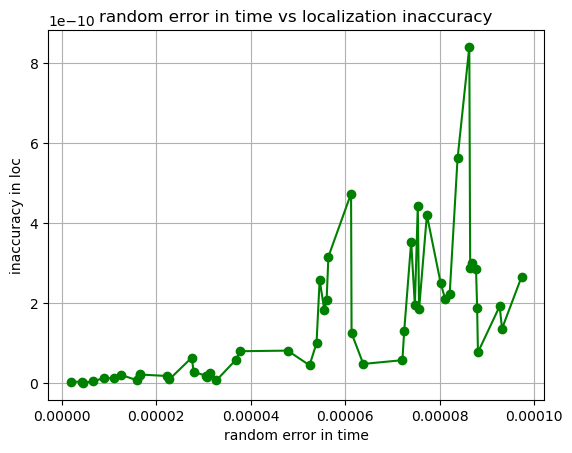

In [18]:
import matplotlib.pyplot as plt
# plt.figure(figsize=(8, 5))
plt.plot(random_error_in_time, inaccuracy_in_loc,marker='o',color='g')
plt.title('random error in time vs localization inaccuracy')
plt.xlabel('random error in time')
plt.ylabel('inaccuracy in loc')
# plt.legend()
plt.grid(True)
plt.show()


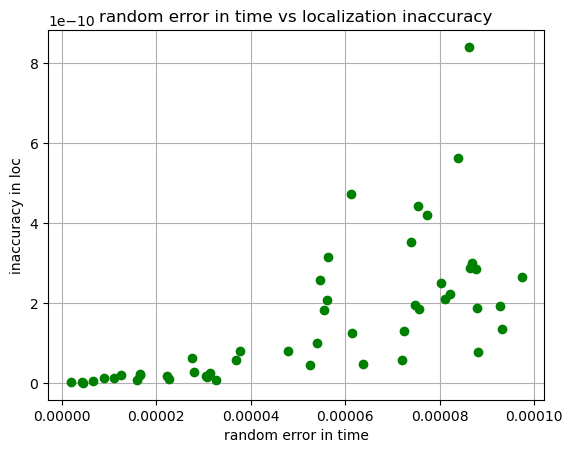

In [19]:
# plt.figure(figsize=(8, 6))
# plt.plot(random_error_in_time, delta_lst, marker='o', linestyle='-', color='b', label='random time error vs delta')
# plt.title('random time error vs delta')
# plt.xlabel('random_error_in_time')
# plt.ylabel('delta')
# plt.legend()
# plt.grid(True)
# plt.show()

plt.plot(random_error_in_time, inaccuracy_in_loc,'go')
plt.title('random error in time vs localization inaccuracy')
plt.xlabel('random error in time')
plt.ylabel('inaccuracy in loc')
# plt.legend()
plt.grid(True)
plt.show()

# avg localization error-

In [20]:
avg_prediction_error = np.average(inaccuracy_in_loc)
print(avg_prediction_error)

1.5729092668089844e-10
